<a href="https://colab.research.google.com/github/Daraskaur/Stock-Prediction/blob/main/Stock_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
!pip install pandas==1.5.3 pandas_datareader==0.10.0 numpy==1.23.5 --force-reinstall

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 27.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.5/109.5 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 52.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.9/229.9 kB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 509.2/509.2 kB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 50.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.6/159.6 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.3/147.3 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.4/70.4 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.7/128.7 kB 9.0 MB/s eta 0:00:00
  Attempting uninstall: pytz
    Found existing installation: pytz 2025.2
    Uninstalling pytz-2025.2:
      Successfully unin

In [ ]:

import pandas_datareader as pdr
import pandas as pd
import os
import datetime
os.environ['TIINGO_API_KEY'] = '074deba77b28710c27bc34818a008f0c1945f238'
company = input('Enter company ticker symbol (e.g., AAPL, MSFT, GOOGL): ')
start = datetime.datetime(2024, 1, 1)
end = datetime.datetime(2024, 12, 31)
df = pdr.get_data_tiingo(company, start=start, end=end)
df.head()

Enter company ticker symbol (e.g., AAPL, MSFT, GOOGL): MSFT


<ipython-input-1-4362e0e2e4eb>:9: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df = pdr.get_data_tiingo(company, start=start, end=end)


close      high      low     open  \
symbol date                                                            
MSFT   2024-01-02 00:00:00+00:00  370.87  375.9000  366.771  373.860   
       2024-01-03 00:00:00+00:00  370.60  373.2562  368.510  369.010   
       2024-01-04 00:00:00+00:00  367.94  373.1000  367.170  370.665   
       2024-01-05 00:00:00+00:00  367.75  372.0600  366.500  368.970   
       2024-01-08 00:00:00+00:00  374.69  375.2000  369.010  369.300   

                                    volume    adjClose     adjHigh  \
symbol date                                                          
MSFT   2024-01-02 00:00:00+00:00  25258633  367.406894  372.389925   
       2024-01-03 00:00:00+00:00  23083465  367.139415  369.770812   
       2024-01-04 00:00:00+00:00  20901502  364.504254  369.616071   
       2024-01-05 00:00:00+00:00  20074451  364.316028  368.585782   
       2024-01-08 00:00:00+00:00  23133967  371.191224  371.696461   

                                      adjLow     adjOpen  adjVolume  divCash  \
symbol date                                                                    
MSFT   2024-01-02 00:00:00+00:00  363.346170  370.368974   25258633      0.0   
       2024-01-03 00:00:00+00:00  365.068931  365.564262   23083465      0.0   
       2024-01-04 00:00:00+00:00  363.741444  367.203808   20901502      0.0   
       2024-01-05 00:00:00+00:00  363.077700  365.524636   20074451      0.0   
       2024-01-08 00:00:00+00:00  365.564262  365.851554   23133967      0.0   

                                  splitFactor  
symbol date                                    
MSFT   2024-01-02 00:00:00+00:00          1.0  
       2024-01-03 00:00:00+00:00          1.0  
       2024-01-04 00:00:00+00:00          1.0  
       2024-01-05 00:00:00+00:00          1.0  
       2024-01-08 00:00:00+00:00          1.0

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df.to_csv(f'/content/drive/MyDrive/{company}.csv')

In [ ]:
df1 = df.reset_index()['close']

In [ ]:
df1

,close
0,370.87
1,370.60
2,367.94
3,367.75
4,374.69
...,...
247,439.33
248,438.11
249,430.53
250,424.83


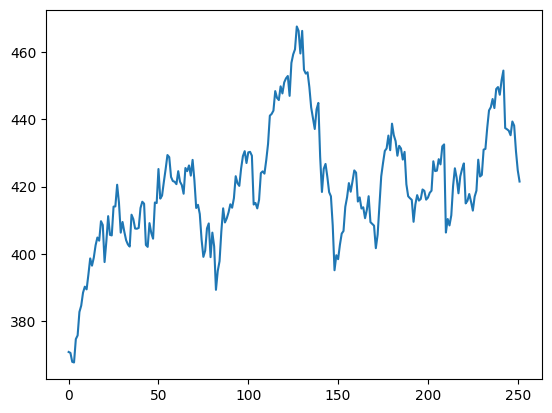

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

scaler = MinMaxScaler()
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:
df1

array([[0.03125939],
       [0.02855425],
       [0.00190362],
       [0.        ],
       [0.06953211],
       [0.08055305],
       [0.15048592],
       [0.16912133],
       [0.20759443],
       [0.22562869],
       [0.21761347],
       [0.26169722],
       [0.3097886 ],
       [0.28814748],
       [0.31209298],
       [0.34876265],
       [0.37190662],
       [0.36248873],
       [0.42049895],
       [0.40917744],
       [0.29886785],
       [0.36098587],
       [0.4355275 ],
       [0.37972147],
       [0.37811843],
       [0.46388137],
       [0.46448252],
       [0.52900511],
       [0.47600441],
       [0.38643423],
       [0.41819457],
       [0.38883879],
       [0.3637912 ],
       [0.35106703],
       [0.34495542],
       [0.43983569],
       [0.42671075],
       [0.39865745],
       [0.39805631],
       [0.40046088],
       [0.45977357],
       [0.47840898],
       [0.47259794],
       [0.34966436],
       [0.3440537 ],
       [0.41468791],
       [0.38543232],
       [0.368

In [ ]:
training_size=int(len(df1)*0.70)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [ ]:
train_data

array([[0.03125939],
       [0.02855425],
       [0.00190362],
       [0.        ],
       [0.06953211],
       [0.08055305],
       [0.15048592],
       [0.16912133],
       [0.20759443],
       [0.22562869],
       [0.21761347],
       [0.26169722],
       [0.3097886 ],
       [0.28814748],
       [0.31209298],
       [0.34876265],
       [0.37190662],
       [0.36248873],
       [0.42049895],
       [0.40917744],
       [0.29886785],
       [0.36098587],
       [0.4355275 ],
       [0.37972147],
       [0.37811843],
       [0.46388137],
       [0.46448252],
       [0.52900511],
       [0.47600441],
       [0.38643423],
       [0.41819457],
       [0.38883879],
       [0.3637912 ],
       [0.35106703],
       [0.34495542],
       [0.43983569],
       [0.42671075],
       [0.39865745],
       [0.39805631],
       [0.40046088],
       [0.45977357],
       [0.47840898],
       [0.47259794],
       [0.34966436],
       [0.3440537 ],
       [0.41468791],
       [0.38543232],
       [0.368

In [ ]:
timespan = 5
timespan = int(input('Enter time span in days: '))

Enter time span in days: 10


In [ ]:
def create_dataset(dataset, span=1):
    x, y = [], []
    for i in range(len(dataset) - span):
        a = dataset[i:(i + span)]
        x.append(a)
        y.append(dataset[i + span])
    x = np.array(x)
    y = np.array(y)

    if len(x.shape) == 1:
        x = np.expand_dims(x, axis=1)

    return x, y

In [ ]:
x_train, y_train = create_dataset(train_data, timespan)
x_test, y_test = create_dataset(test_data, timespan)

In [ ]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1])
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1])
y_train = y_train.ravel()
y_test = y_test.ravel()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(x_train, y_train)
predictions = model.predict(x_test)
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 0.0030594313477805284


In [ ]:
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)

In [ ]:

train_predict = train_predict.reshape(-1, 1)
test_predict = test_predict.reshape(-1, 1)

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)


In [ ]:
mse_test = mean_squared_error(y_test, test_predict)
rmse_test = np.sqrt(mse_test)
print(f"Test RMSE: {rmse_test:.4f}")

Test RMSE: 425.5248


In [ ]:
l = len(test_data)

In [ ]:
x_input=test_data[l - timespan:].reshape (1,-1)
x_input.shape

(1, 10)

In [ ]:
x_input

array([[0.86875063, 0.69772568, 0.69411883, 0.68981064, 0.67628494,
        0.71716261, 0.70493938, 0.62899509, 0.57188658, 0.53852319]])

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
temp_input

[0.86875062618976,
 0.6977256787897002,
 0.6941188257689603,
 0.689810640216411,
 0.676284941388638,
 0.7171626089570182,
 0.7049393848311798,
 0.6289950906722774,
 0.5718865845105698,
 0.5385231940687305]

In [ ]:
output = []

In [ ]:
lst_output = []
n_steps = timespan
i = 1
while i <= 30:
    if len(temp_input) > timespan:
        x_input = np.array(temp_input[-timespan:])
        print(f"{i} day input {x_input}")
        x_input = x_input.reshape(1, n_steps)
        yhat = model.predict(x_input)
        print(f"{i} day output {yhat}")
        temp_input.append(yhat[0])
        temp_input = temp_input[1:]
        lst_output.append(yhat[0])
        i += 1
    else:
        x_input = np.array(temp_input).reshape(1, n_steps)
        yhat = model.predict(x_input)
        print(f"Initial prediction output {yhat[0]}")
        temp_input.append(yhat[0])
        lst_output.append(yhat[0])
        i += 1
print(lst_output)

Initial prediction output 0.5394275842697086
2 day input [0.69772568 0.69411883 0.68981064 0.67628494 0.71716261 0.70493938
 0.62899509 0.57188658 0.53852319 0.53942758]
2 day output [0.53621167]
3 day input [0.69411883 0.68981064 0.67628494 0.71716261 0.70493938 0.62899509
 0.57188658 0.53852319 0.53942758 0.53621167]
3 day output [0.52365974]
4 day input [0.68981064 0.67628494 0.71716261 0.70493938 0.62899509 0.57188658
 0.53852319 0.53942758 0.53621167 0.52365974]
4 day output [0.52508252]
5 day input [0.67628494 0.71716261 0.70493938 0.62899509 0.57188658 0.53852319
 0.53942758 0.53621167 0.52365974 0.52508252]
5 day output [0.52495876]
6 day input [0.71716261 0.70493938 0.62899509 0.57188658 0.53852319 0.53942758
 0.53621167 0.52365974 0.52508252 0.52495876]
6 day output [0.51684678]
7 day input [0.70493938 0.62899509 0.57188658 0.53852319 0.53942758 0.53621167
 0.52365974 0.52508252 0.52495876 0.51684678]
7 day output [0.51409878]
8 day input [0.62899509 0.57188658 0.53852319 0.5

In [ ]:
lst_output = np.array(lst_output).reshape(-1, 1)
output = scaler.inverse_transform(lst_output[1:])
print(output)

[[421.2692863 ]
 [420.01647843]
 [420.15848677]
 [420.14613422]
 [419.33647685]
 [419.06219904]
 [418.97781661]
 [419.1909443 ]
 [419.3831082 ]
 [419.34192736]
 [419.54344222]
 [419.78441304]
 [419.85704177]
 [420.0223204 ]
 [420.19662093]
 [420.37032402]
 [420.55106998]
 [420.67599004]
 [420.82383265]
 [420.98109311]
 [421.09378141]
 [421.21334119]
 [421.32882664]
 [421.42981195]
 [421.52887527]
 [421.61259937]
 [421.69149251]
 [421.76912029]
 [421.83345111]]


In [ ]:
output

array([[421.2692863 ],
       [420.01647843],
       [420.15848677],
       [420.14613422],
       [419.33647685],
       [419.06219904],
       [418.97781661],
       [419.1909443 ],
       [419.3831082 ],
       [419.34192736],
       [419.54344222],
       [419.78441304],
       [419.85704177],
       [420.0223204 ],
       [420.19662093],
       [420.37032402],
       [420.55106998],
       [420.67599004],
       [420.82383265],
       [420.98109311],
       [421.09378141],
       [421.21334119],
       [421.32882664],
       [421.42981195],
       [421.52887527],
       [421.61259937],
       [421.69149251],
       [421.76912029],
       [421.83345111]])

In [ ]:
day_new=np.arange(1,timespan + 1)
day_pred=np.arange (timespan + 1,timespan + 31)

In [ ]:
df3=df1.tolist()
df3.extend(lst_output)

In [ ]:
len(df1)

252

In [ ]:
df3

[[0.03125939284640822],
 [0.028554253080853798],
 [0.001903616872056979],
 [0.0],
 [0.0695321110109206],
 [0.08055305079651376],
 [0.15048592325418264],
 [0.16912133052800327],
 [0.20759442941589068],
 [0.22562869451958711],
 [0.21761346558461092],
 [0.2616972247269813],
 [0.30978859833684025],
 [0.28814748021240355],
 [0.3120929766556455],
 [0.348762649033163],
 [0.37190662258290796],
 [0.36248872858431014],
 [0.42049894800120224],
 [0.40917743713054744],
 [0.2988678489129346],
 [0.36098587315900144],
 [0.43552750225428305],
 [0.37972147079450913],
 [0.37811842500751425],
 [0.4638813746117627],
 [0.464482516781886],
 [0.5290051097084465],
 [0.47600440837591407],
 [0.38643422502755254],
 [0.418194569682397],
 [0.38883879370804575],
 [0.3637912032862438],
 [0.35106702735196915],
 [0.34495541528904905],
 [0.43983568780683235],
 [0.4267107504258085],
 [0.39865744915339185],
 [0.39805630698326855],
 [0.40046087566376176],
 [0.45977356978258666],
 [0.4784089770564073],
 [0.4725979360785493]

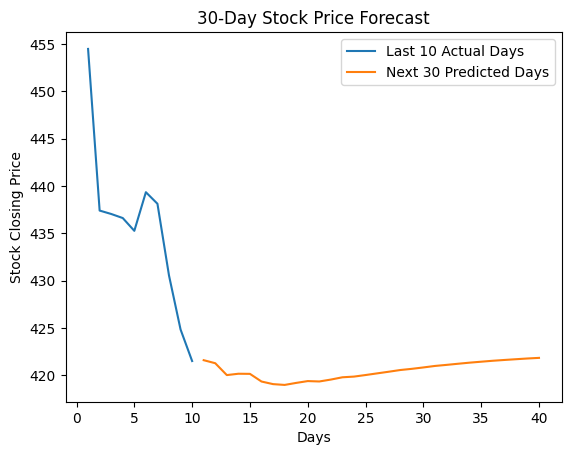

In [ ]:
plt.plot(day_new, scaler.inverse_transform(df1[-timespan:].reshape(-1, 1)))
plt.plot(day_pred, scaler.inverse_transform(lst_output.reshape(-1, 1)))
plt.xlabel("Days")
plt.ylabel("Stock Closing Price")
plt.title("30-Day Stock Price Forecast")
plt.legend(["Last 10 Actual Days", "Next 30 Predicted Days"])
plt.show()
